In [4]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

**1.** Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

**2.** Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

**3.** На каких платформах произошло больше всего релизов?

**4.** Игры каких издателей (Publisher) встречаются в датасете чаще всего?

**5.** В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)

**6.** Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

**7.** Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров:Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?


In [5]:
games = pd.read_csv('C:/Users/79196/Projects/data/games_1.csv', encoding = 'utf-8')
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales;
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74;
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24;
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82;
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33;
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37;
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01;
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01;
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01;
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01;


In [6]:
games.dtypes

Rank              object
Name              object
Platform          object
Year             float64
Genre             object
Publisher         object
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Global_Sales;     object
dtype: object

In [7]:
games.isna().sum()

Rank               0
Name             123
Platform         123
Year             392
Genre            123
Publisher        180
NA_Sales         123
EU_Sales         123
JP_Sales         123
Other_Sales      123
Global_Sales;    123
dtype: int64

In [8]:
games_notnull = games.dropna()
games_notnull

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales;
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74;
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24;
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82;
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33;
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37;
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01;
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01;
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01;
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01;


In [9]:
counts_games_bydate = games_notnull.groupby(['Year'], as_index = False) \
                                   .agg({'Name':'count'}) \
                                   .rename(columns={'Name':'Count_games'})
counts_games_bydate

,Year,Count_games
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


In [10]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

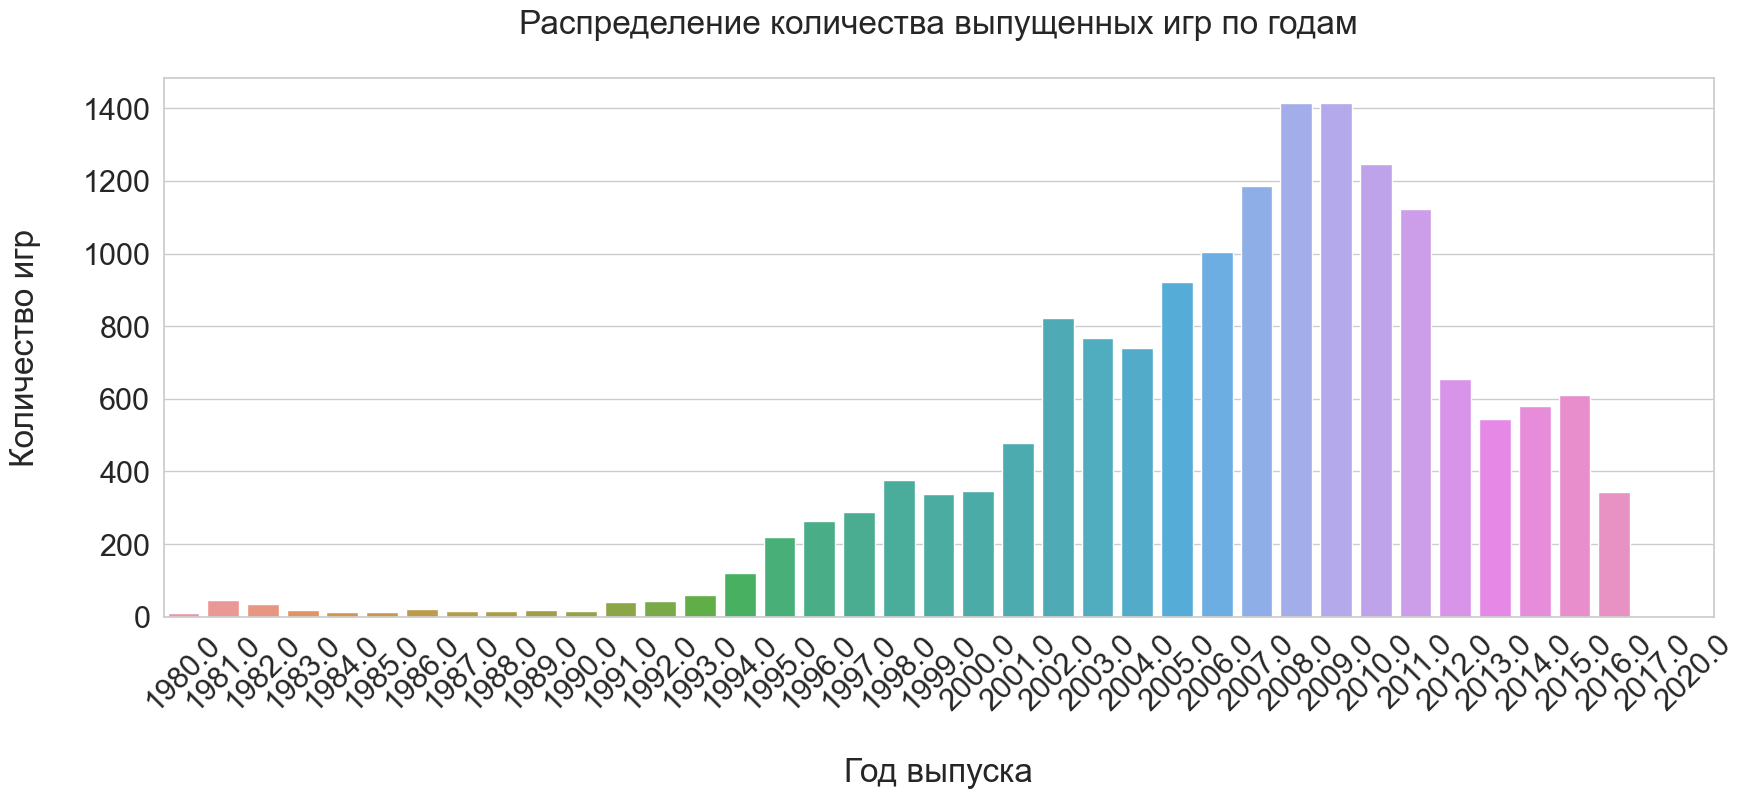

In [11]:
ax1 = sns.barplot(data = counts_games_bydate, x='Year', y = 'Count_games')
ax1.set_title('Распределение количества выпущенных игр по годам\n')
ax1.set_ylabel('Количество игр\n')
ax1.set_xlabel('\nГод выпуска')
plt.xticks(rotation=45)
plt.show()

In [12]:
moda_Year = games_notnull.Year.mode()
moda_Year

0    2008.0
1    2009.0
Name: Year, dtype: float64

In [13]:
median_Year = games_notnull.Year.median()
median_Year

2007.0

In [14]:
mean_Year = games_notnull.Year.mean()
mean_Year

2006.4015830808237

На каких платформах произошло больше всего релизов?

In [15]:
count_games_byplatform = games_notnull.groupby(['Platform'], as_index=False) \
                                  .agg({'Name':'count'}) \
                                  .rename(columns = {'Name':'Count_games'})
count_games_byplatform

,Platform,Count_games
0,2600,116
1,3DO,3
2,3DS,496
3,DC,50
4,DS,2105
5,GB,97
6,GBA,773
7,GC,538
8,GEN,26
9,GG,1


In [16]:
count_games_byplatform['percentage'] = (count_games_byplatform.Count_games / count_games_byplatform.Count_games.sum()) * 100
count_games_byplatform.query('percentage > 7').sort_values('Count_games', ascending=False)

,Platform,Count_games,percentage
16,PS2,2110,13.048049
4,DS,2105,13.017129
17,PS3,1298,8.026714
26,Wii,1282,7.927772
28,X360,1227,7.587657
15,PS,1185,7.327933
19,PSP,1184,7.321749


Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [17]:
games_notnull.Publisher.value_counts()

Electronic Arts                 1339
Activision                       952
Namco Bandai Games               927
Ubisoft                          915
Konami Digital Entertainment     820
                                ... 
Pow                                1
Navarre Corp                       1
MediaQuest                         1
Max Five                           1
UIG Entertainment                  1
Name: Publisher, Length: 571, dtype: int64

In [18]:
games_by_Nintendo = games_notnull.query('Publisher == "Nintendo"')
games_by_Nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales;
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74;
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24;
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82;
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33;
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37;
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01;
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01;
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01;
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01;


In [19]:
EU_Sales_mean = games_by_Nintendo.EU_Sales.mean()
EU_Sales_mean

0.6032900432900433

In [20]:
EU_Sales_median = games_by_Nintendo.EU_Sales.median()
EU_Sales_median

0.12

In [21]:
np.std( games_by_Nintendo.EU_Sales)

1.7461206222833565

In [22]:
NA_Sales_mean = games_by_Nintendo.NA_Sales.mean()
NA_Sales_mean

1.175064935064935

In [23]:
NA_Sales_median = games_by_Nintendo.NA_Sales.median()
NA_Sales_median

0.37

In [24]:
np.std(games_by_Nintendo.NA_Sales)

2.993823107589234

In [25]:
JP_Sales_mean = games_by_Nintendo.JP_Sales.mean()
JP_Sales_mean

0.6535642135642137

In [26]:
JP_Sales_median = games_by_Nintendo.JP_Sales.median()
JP_Sales_median

0.28

In [27]:
np.std(games_by_Nintendo.JP_Sales)

1.0645588592369772

In [28]:
games_by_Nintendo.Other_Sales.median()

0.03

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

    - по оси x будет расположен жанр игры (Genre)
    - по оси у объем продаж в Японии (JP_sales)
Выберите правильный утверждения:   
1.Наибольший межквартильный размах наблюдается у игр жанра Role-Playing

2.Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation

3.Межквартильный размах у Strategy меньше, чем у Puzzle

4.Среднее значение продаж игр жанра Fighting выше, чем у игр Simulation

5.Наибольший межквартильный размах наблюдается у игр жанра Fighting

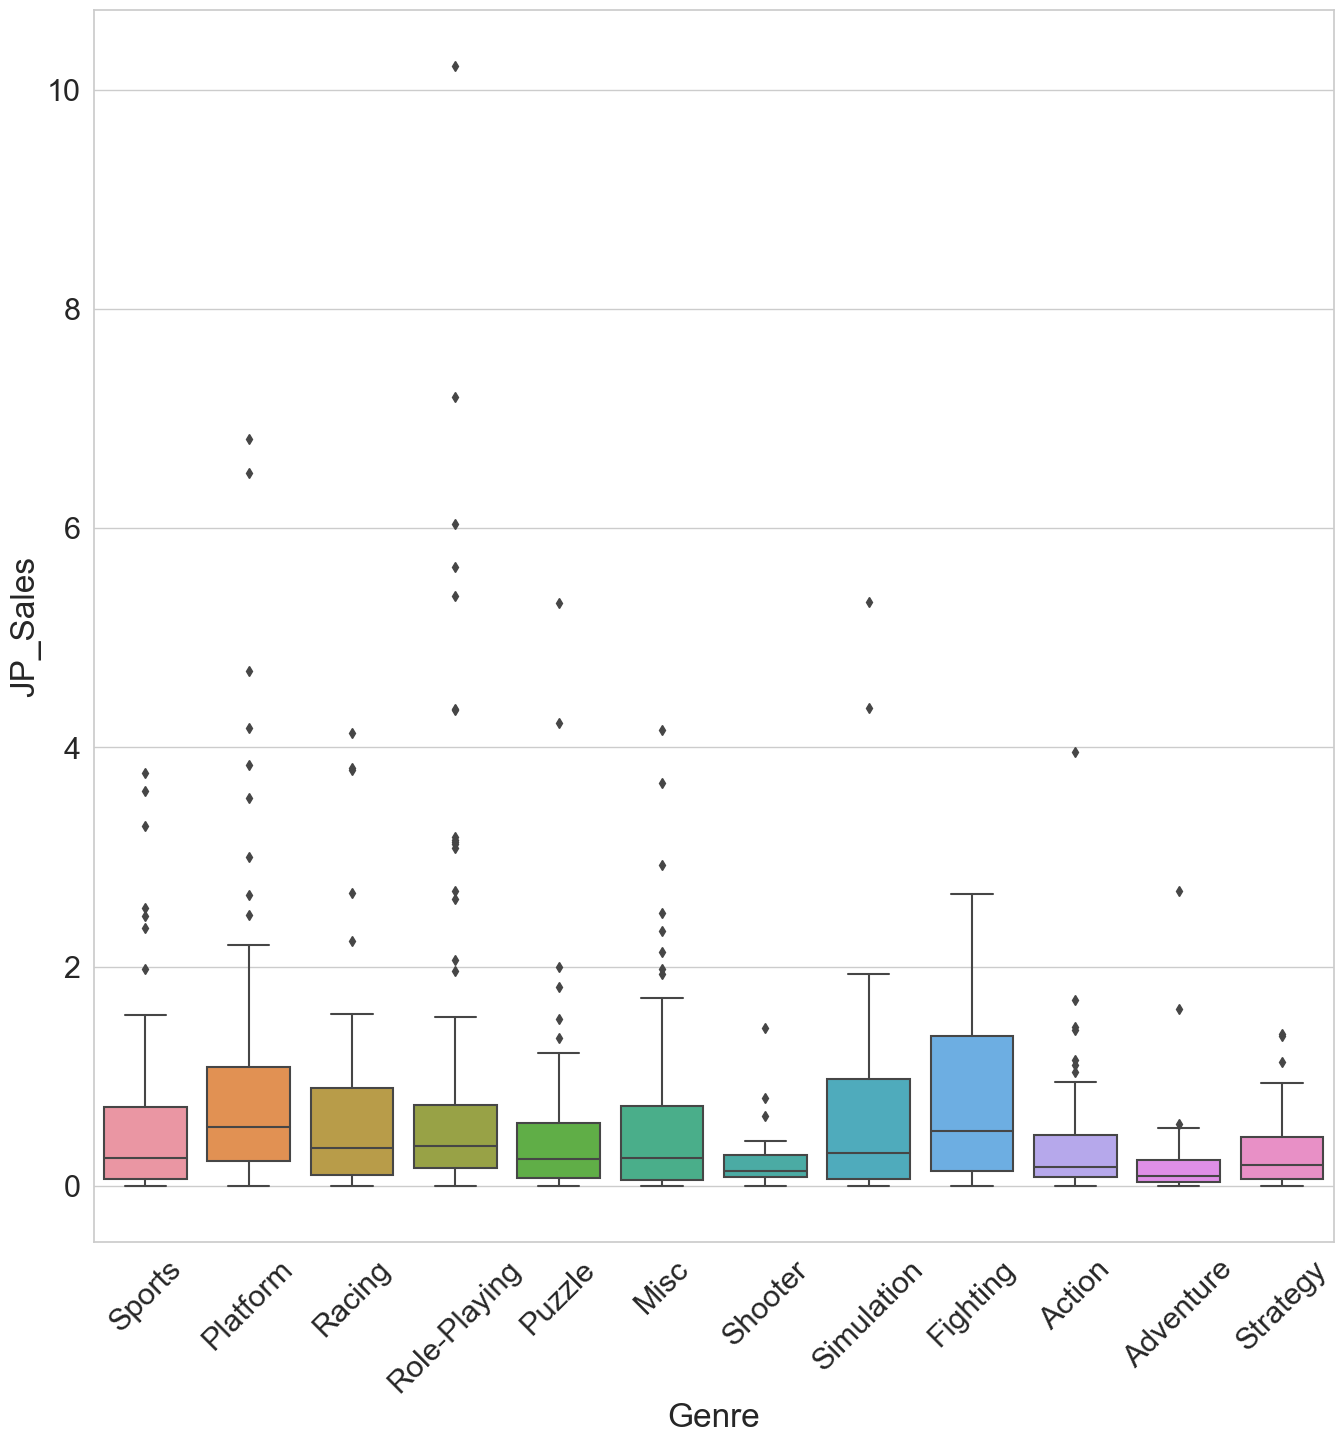

In [29]:
plt.figure(figsize=(16,16))
plt.xticks(rotation=45)
ax = sns.boxplot(data = games_by_Nintendo, x='Genre', y = 'JP_Sales')

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

In [35]:
games_by_Nintendo['Global_Sales;'] = games_by_Nintendo['Global_Sales;'].str.replace(';', '').astype('float')

C:\Users\79196\AppData\Local\Temp\ipykernel_15012\3146080615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_by_Nintendo['Global_Sales;'] = games_by_Nintendo['Global_Sales;'].str.replace(';', '').astype('float')


In [48]:
distribution_sales_by_year = games_by_Nintendo.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')") \
                                              .groupby(['Year'], as_index=False) \
                                              .agg({'Global_Sales;':'sum'}) \
                                              .rename(columns={'Global_Sales;':'Sum_Global_Sales'})
distribution_sales_by_year

,Year,Sum_Global_Sales
0,1983.0,8.82
1,1984.0,11.86
2,1985.0,45.13
3,1986.0,6.37
4,1987.0,7.57
5,1988.0,30.86
6,1989.0,23.86
7,1990.0,29.49
8,1991.0,5.06
9,1992.0,13.89


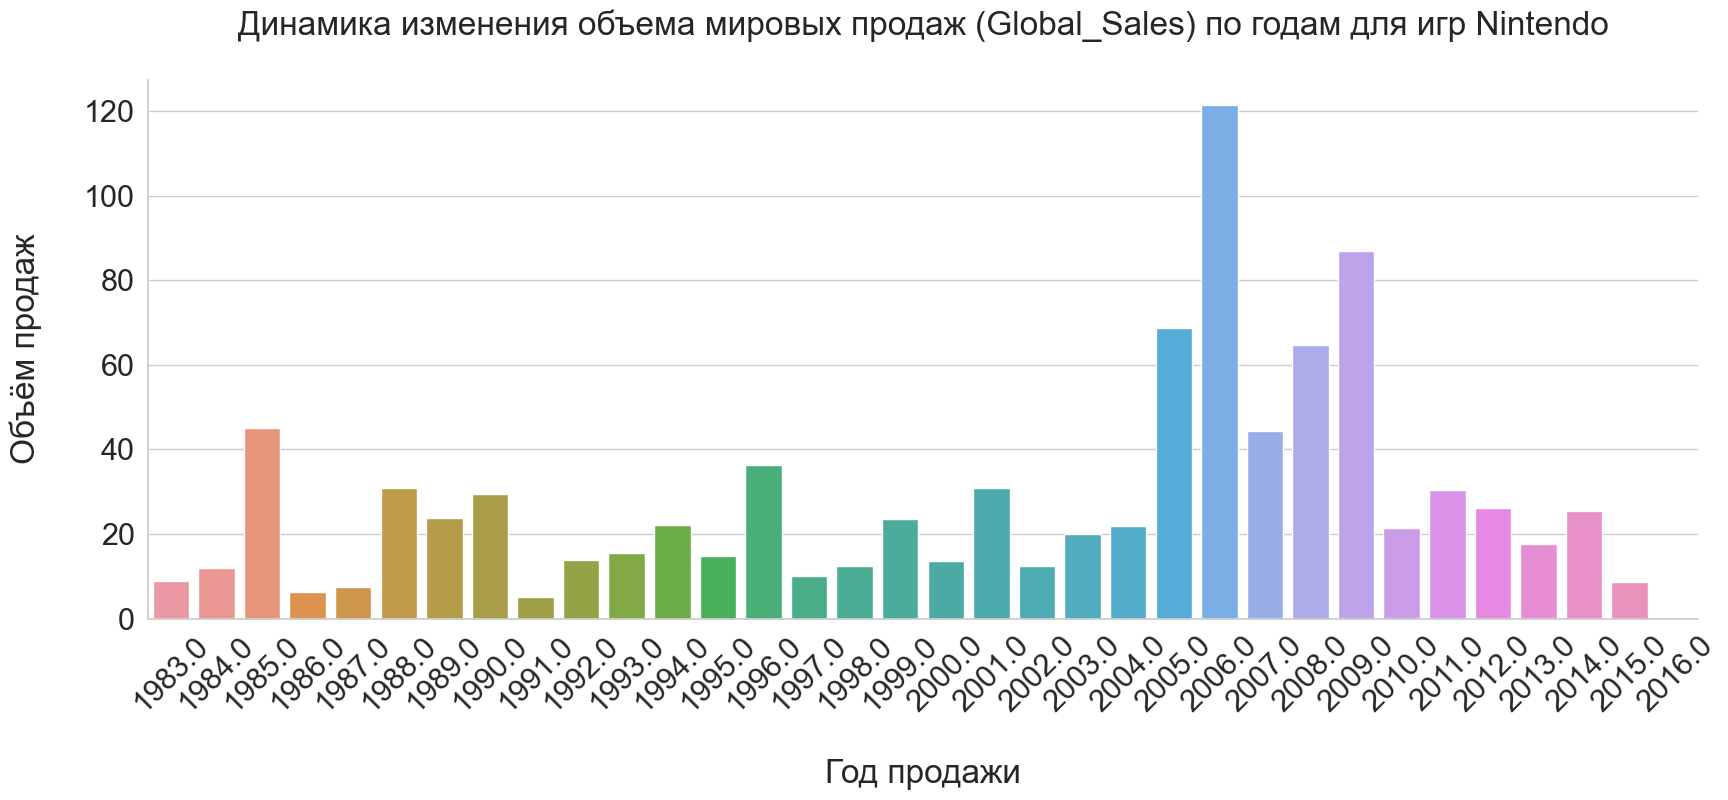

In [56]:
ax3 = sns.barplot(data = distribution_sales_by_year, x = 'Year', y='Sum_Global_Sales')
ax3.set_title('Динамика изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo\n')
ax3.set_ylabel('Объём продаж\n')
ax3.set_xlabel('\nГод продажи')
plt.xticks(rotation=45)
sns.despine()